## Spectral analysis of Audio signals in Python

Necessary imports

In [22]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd

Creating a sample sinusoid

In [23]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t)

In [24]:
sd.play(x,1000)

Computing its DFT

Text(0.5, 1.0, 'DFT of sinusoid')

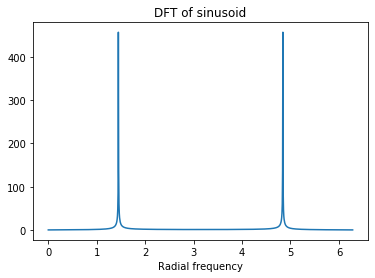

In [25]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of sinusoid')

Text(0.5, 1.0, 'DFT of sinusoid')

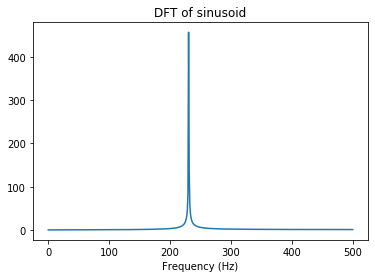

In [26]:
%matplotlib inline
y_cut = y[:500]
f = np.linspace(0,500,500)
plt.plot(f,np.abs(y_cut))
plt.xlabel('Frequency (Hz)')
plt.title('DFT of sinusoid')

In [27]:
print(np.argmax(np.abs(y_cut)))

230


Repeating the above process for a noisy sinusoid

In [28]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t) + 0.15*np.random.normal(size=(1000,))

In [29]:
sd.play(x,1000)

Text(0.5, 1.0, 'DFT of noisy sinusoid')

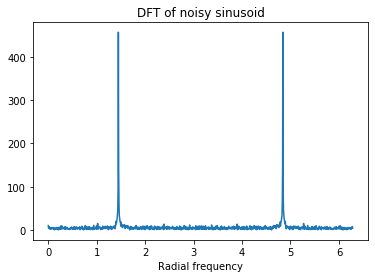

In [30]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of noisy sinusoid')

Librosa: Loading a file + displaying its spectrogram

In [31]:
sr = 22050
y,fs = librosa.load('song_excerpt1.mp3',sr)

/home/christos/.local/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [32]:
segment = y[:100000]
sd.play(y[:100000],sr)

In [33]:
S = librosa.stft(segment,n_fft=1024,hop_length=512)
print(S.shape)

(513, 196)


Text(0.5, 1.0, 'STFT of the signal segment')

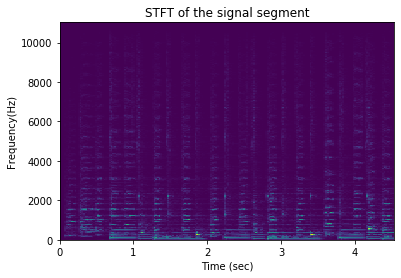

In [34]:
%matplotlib inline
t = np.linspace(0,100000/22050,196)
f = np.linspace(0,11025,513)
plt.pcolormesh(t,f,np.abs(S))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the signal segment')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 1.0, 'Log-STFT of the signal segment')

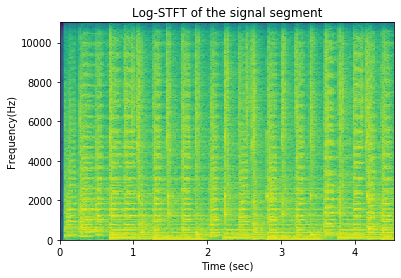

In [35]:
%matplotlib inline
plt.pcolormesh(t,f,np.log10(np.abs(S)))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('Log-STFT of the signal segment')

Continuous Wavelet Transform of the Signal

In [36]:
s = np.power(2,np.linspace(1,7,96))
coefs,freqs = pywt.cwt(segment[2000:4000],s,'cmor3.0-1.0')
print(coefs.shape)

(96, 2000)


Text(0.5, 1.0, 'CWT of the signal segment')

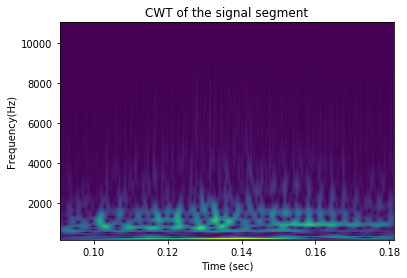

In [37]:
%matplotlib inline
t = np.linspace(2000/22050,4000/22050,2000)
f = freqs*22050
plt.pcolormesh(t,f,np.abs(coefs))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('CWT of the signal segment')

Discrete Wavelet Transform

In [38]:
ya,yd = pywt.dwt(y[2000:4000],'db4')

ya_r = sp.signal.resample(ya,2000)
yd_r = sp.signal.resample(yd,2000)

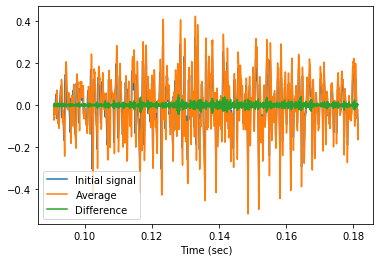

In [39]:
%matplotlib inline
plt.plot(t,y[2000:4000])
plt.plot(t,ya_r)
plt.plot(t,yd_r)
plt.xlabel('Time (sec)')
plt.legend(('Initial signal','Average','Difference'))

Signal interpolation

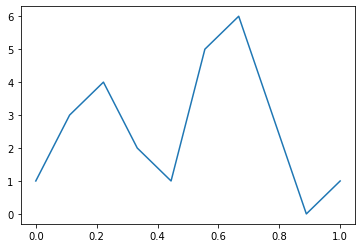

In [40]:
%matplotlib inline

t = np.linspace(0,1,10)
x = np.asarray([1,3,4,2,1,5,6,3,0,1])
plt.plot(t,x)

In [49]:
t2 = np.linspace(0,1,20) #linear interpolation
x_lin = np.interp(t2,t,x) #arguments: new linspace, old linspace, signal
x_nonlin = sp.signal.resample(x,20) #non-linear interpolation (FFT-based)

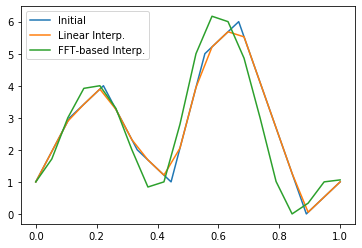

In [50]:
%matplotlib inline
plt.plot(t,x)
plt.plot(t2,x_lin)
plt.plot(t2,x_nonlin)
plt.legend(['Initial', 'Linear Interp.', 'FFT-based Interp.'])